# Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Data

Dataset: Covid Vaccination Data for Each State in the USA (Kaggle)
15 columns of data for all US states and territories. 
Link: https://www.kaggle.com/datasets/paultimothymooney/usa-covid19-vaccinations

Dataset2: Covid Case and Death Data for Each State (Kaggle)
Link: https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv

In [2]:
df1 = pd.read_csv('us_state_vaccinations.csv')
df1.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [3]:
df1 = df1[df1['date'] == '2022-03-17']
df1.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
429,2022-03-17,Alabama,6138900.0,9349340.0,3046606.0,50.52,125.20,2477117.0,62.14,190.68,2287.0,2087.0,426.0,0.657,858951.0,17.52
859,2022-03-17,Alaska,1108082.0,1467065.0,504566.0,61.43,151.47,449380.0,68.97,200.54,57.0,283.0,387.0,0.755,188128.0,25.72
1289,2022-03-17,American Samoa,99524.0,110410.0,44277.0,83.84,210.00,39734.0,93.43,232.97,1328.0,809.0,17070.0,0.901,16124.0,34.02
1719,2022-03-17,Arizona,11662231.0,14229120.0,5233530.0,60.54,160.22,4406487.0,71.90,195.49,5994.0,6408.0,880.0,0.820,1771872.0,24.34
2149,2022-03-17,Arkansas,4115482.0,5924080.0,1991174.0,53.78,136.37,1623014.0,65.98,196.30,34.0,1555.0,515.0,0.695,621200.0,20.58


In [4]:
len(df1)

64

In [5]:
df1 = df1.set_index('location')
df1.rename(index = {'New York State':'New York'})
df1.head()

,date,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
location,,,,,,,,,,,,,,,
Alabama,2022-03-17,6138900.0,9349340.0,3046606.0,50.52,125.20,2477117.0,62.14,190.68,2287.0,2087.0,426.0,0.657,858951.0,17.52
Alaska,2022-03-17,1108082.0,1467065.0,504566.0,61.43,151.47,449380.0,68.97,200.54,57.0,283.0,387.0,0.755,188128.0,25.72
American Samoa,2022-03-17,99524.0,110410.0,44277.0,83.84,210.00,39734.0,93.43,232.97,1328.0,809.0,17070.0,0.901,16124.0,34.02
Arizona,2022-03-17,11662231.0,14229120.0,5233530.0,60.54,160.22,4406487.0,71.90,195.49,5994.0,6408.0,880.0,0.820,1771872.0,24.34
Arkansas,2022-03-17,4115482.0,5924080.0,1991174.0,53.78,136.37,1623014.0,65.98,196.30,34.0,1555.0,515.0,0.695,621200.0,20.58


In [6]:
df2 = pd.read_csv('us_cases.csv')
df2.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [7]:
df2 = df2[df2['date'] == '2022-03-17']
df2.head()

,date,state,fips,cases,deaths
41110,2022-03-17,Alabama,1,1290692,18998
41111,2022-03-17,Alaska,2,242815,1166
41112,2022-03-17,American Samoa,60,865,0
41113,2022-03-17,Arizona,4,1992471,28547
41114,2022-03-17,Arkansas,5,828166,11030


In [8]:
len(df2)

56

In [9]:
df2 = df2.set_index('state')

In [10]:
df = pd.merge(left=df1,right=df2,left_index=True,right_index=True,how='inner')
df.head()

,date_x,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred,date_y,fips,cases,deaths
Alabama,2022-03-17,6138900.0,9349340.0,3046606.0,50.52,125.20,2477117.0,62.14,190.68,2287.0,2087.0,426.0,0.657,858951.0,17.52,2022-03-17,1,1290692,18998
Alaska,2022-03-17,1108082.0,1467065.0,504566.0,61.43,151.47,449380.0,68.97,200.54,57.0,283.0,387.0,0.755,188128.0,25.72,2022-03-17,2,242815,1166
American Samoa,2022-03-17,99524.0,110410.0,44277.0,83.84,210.00,39734.0,93.43,232.97,1328.0,809.0,17070.0,0.901,16124.0,34.02,2022-03-17,60,865,0
Arizona,2022-03-17,11662231.0,14229120.0,5233530.0,60.54,160.22,4406487.0,71.90,195.49,5994.0,6408.0,880.0,0.820,1771872.0,24.34,2022-03-17,4,1992471,28547
Arkansas,2022-03-17,4115482.0,5924080.0,1991174.0,53.78,136.37,1623014.0,65.98,196.30,34.0,1555.0,515.0,0.695,621200.0,20.58,2022-03-17,5,828166,11030


In [11]:
len (df)

55

In [12]:
df.head()

,date_x,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred,date_y,fips,cases,deaths
Alabama,2022-03-17,6138900.0,9349340.0,3046606.0,50.52,125.20,2477117.0,62.14,190.68,2287.0,2087.0,426.0,0.657,858951.0,17.52,2022-03-17,1,1290692,18998
Alaska,2022-03-17,1108082.0,1467065.0,504566.0,61.43,151.47,449380.0,68.97,200.54,57.0,283.0,387.0,0.755,188128.0,25.72,2022-03-17,2,242815,1166
American Samoa,2022-03-17,99524.0,110410.0,44277.0,83.84,210.00,39734.0,93.43,232.97,1328.0,809.0,17070.0,0.901,16124.0,34.02,2022-03-17,60,865,0
Arizona,2022-03-17,11662231.0,14229120.0,5233530.0,60.54,160.22,4406487.0,71.90,195.49,5994.0,6408.0,880.0,0.820,1771872.0,24.34,2022-03-17,4,1992471,28547
Arkansas,2022-03-17,4115482.0,5924080.0,1991174.0,53.78,136.37,1623014.0,65.98,196.30,34.0,1555.0,515.0,0.695,621200.0,20.58,2022-03-17,5,828166,11030


In [13]:
df.drop(['date_y'],axis=1)

,date_x,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred,fips,cases,deaths
Alabama,2022-03-17,6138900.0,9349340.0,3046606.0,50.52,125.20,2477117.0,62.14,190.68,2287.0,2087.0,426.0,0.657,858951.0,17.52,1,1290692,18998
Alaska,2022-03-17,1108082.0,1467065.0,504566.0,61.43,151.47,449380.0,68.97,200.54,57.0,283.0,387.0,0.755,188128.0,25.72,2,242815,1166
American Samoa,2022-03-17,99524.0,110410.0,44277.0,83.84,210.00,39734.0,93.43,232.97,1328.0,809.0,17070.0,0.901,16124.0,34.02,60,865,0
Arizona,2022-03-17,11662231.0,14229120.0,5233530.0,60.54,160.22,4406487.0,71.90,195.49,5994.0,6408.0,880.0,0.820,1771872.0,24.34,4,1992471,28547
Arkansas,2022-03-17,4115482.0,5924080.0,1991174.0,53.78,136.37,1623014.0,65.98,196.30,34.0,1555.0,515.0,0.695,621200.0,20.58,5,828166,11030
California,2022-03-17,72240851.0,86798425.0,32503647.0,70.89,182.83,28009145.0,82.26,219.67,36917.0,37317.0,944.0,0.832,13745440.0,34.79,6,9054556,88015
Colorado,2022-03-17,10396327.0,11975575.0,4530538.0,69.56,180.53,4005753.0,78.67,207.95,4309.0,3935.0,683.0,0.868,2023645.0,35.14,8,1336171,12134
Connecticut,2022-03-17,7351934.0,8388235.0,3363752.0,78.17,206.21,2786975.0,94.35,235.28,2907.0,3352.0,940.0,0.876,1403622.0,39.37,9,731532,10677
Delaware,2022-03-17,1747068.0,2248655.0,799874.0,68.08,179.41,662913.0,82.14,230.92,828.0,643.0,660.0,0.777,292907.0,30.08,10,258428,2812
District of Columbia,2022-03-17,1437075.0,1797905.0,677679.0,72.11,203.62,508942.0,96.02,254.75,2962.0,1076.0,1525.0,0.799,181517.0,25.72,11,135575,1327


In [14]:
df.tail()

,date_x,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred,date_y,fips,cases,deaths
Virginia,2022-03-17,15992551.0,18934425.0,7238790.0,72.34,187.36,6174658.0,84.81,221.83,6054.0,5848.0,685.0,0.845,2852612.0,33.42,2022-03-17,51,1658568,19430
Washington,2022-03-17,13970789.0,17048395.0,6098493.0,71.83,183.47,5469983.0,80.09,223.88,6852.0,5949.0,781.0,0.819,2779182.0,36.50,2022-03-17,53,1444303,12348
West Virginia,2022-03-17,2650912.0,3897245.0,1154849.0,57.03,147.92,1022106.0,64.44,217.46,1086.0,772.0,431.0,0.680,456406.0,25.47,2022-03-17,54,496182,6635
Wisconsin,2022-03-17,9937464.0,11174245.0,4151205.0,64.91,170.68,3779552.0,71.30,191.92,3665.0,3941.0,677.0,0.889,2079856.0,35.72,2022-03-17,55,1580136,13901
Wyoming,2022-03-17,735316.0,943485.0,336920.0,50.88,127.05,294445.0,58.21,163.02,311.0,265.0,458.0,0.779,123820.0,21.39,2022-03-17,56,155815,1769


# Preprocessing/Initial Data Exploration

The goal of this project is to see how different metrics of vaccinations in a state will affect its level of covid cases and death. Thus it is important to explore the different features of vaccinations to see if they are good predictors of covid level.

In [15]:
total_vaccinations = df['total_vaccinations']
people_fully_vaccinated = df['people_fully_vaccinated']
people_fully_per_hundred = df['people_fully_vaccinated_per_hundred']
total_boosters = df['total_boosters']
total_boosters_per_hundred = df['total_boosters_per_hundred']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_vaccinations', ylabel='Density'>

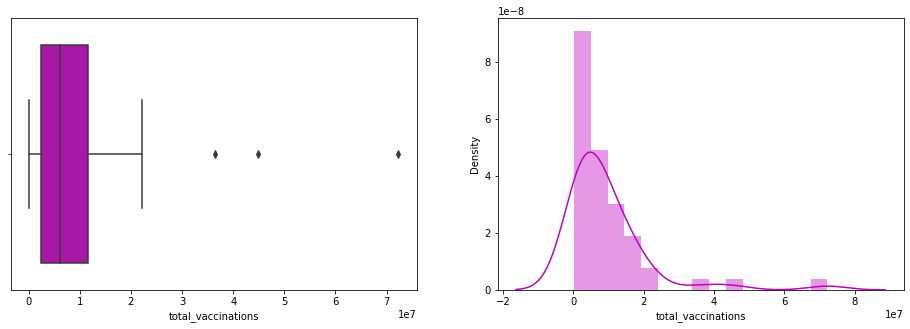

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.boxplot(total_vaccinations, palette=["m", "g"], ax=axs[0])
sns.distplot(total_vaccinations, color="m", ax=axs[1])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='people_fully_vaccinated', ylabel='Density'>

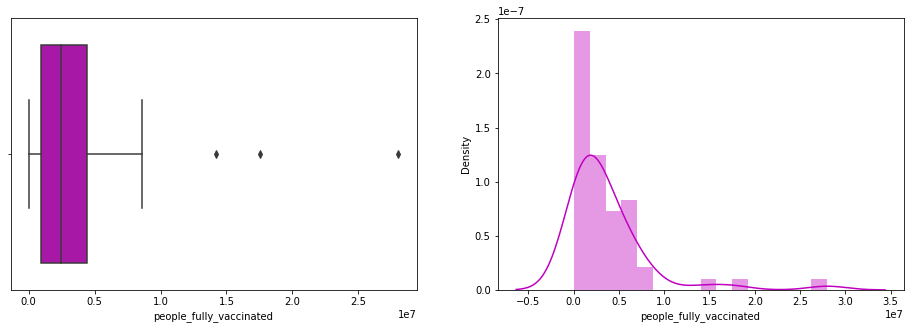

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.boxplot(people_fully_vaccinated, palette=["m", "g"], ax=axs[0])
sns.distplot(people_fully_vaccinated, color="m", ax=axs[1])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='people_fully_vaccinated_per_hundred', ylabel='Density'>

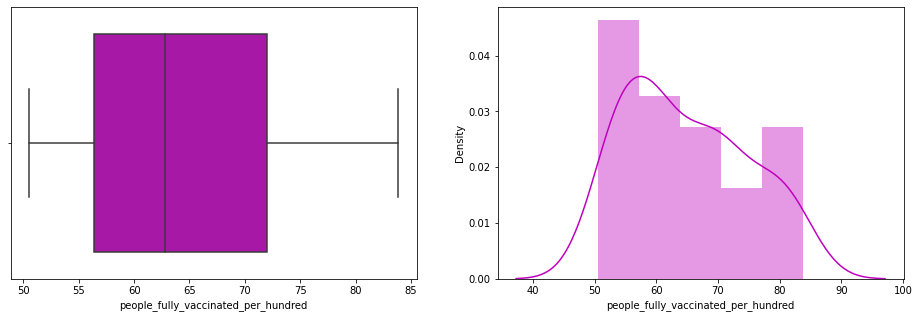

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.boxplot(people_fully_per_hundred, palette=["m", "g"], ax=axs[0])
sns.distplot(people_fully_per_hundred, color="m", ax=axs[1])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_boosters', ylabel='Density'>

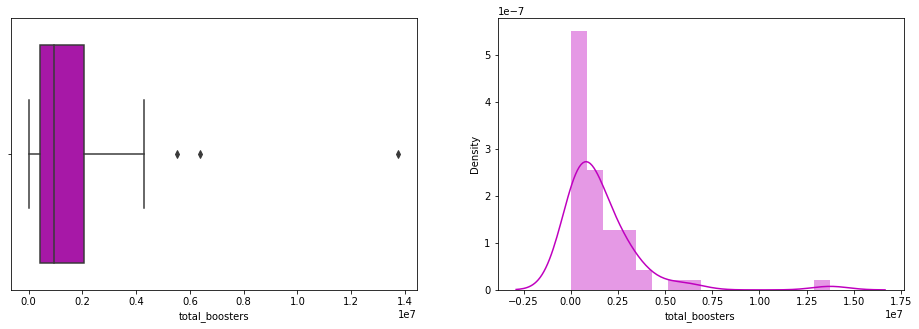

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.boxplot(total_boosters, palette=["m", "g"], ax=axs[0])
sns.distplot(total_boosters, color="m", ax=axs[1])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_boosters_per_hundred', ylabel='Density'>

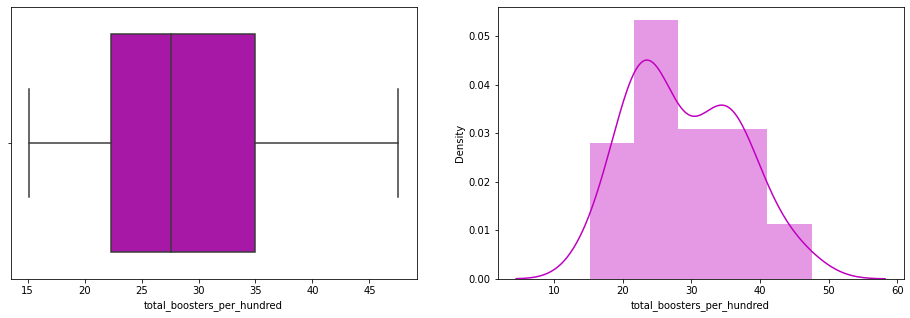

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.boxplot(total_boosters_per_hundred, palette=["m", "g"], ax=axs[0])
sns.distplot(total_boosters_per_hundred, color="m", ax=axs[1])

# Model 1

For the first model I am making a linear regression model that will the vaccination features above to try and predict
the covid case count.

In [21]:
df = df.reset_index()

In [22]:
# training data will be half of the states in the United States
x_train = df.loc[:27,['total_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred','total_boosters','total_boosters']]
y_train = df.loc[:27,['cases']]

# test data will be the other half of the states in the United States

x_test = df.loc[27:,['total_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred','total_boosters','total_boosters']]
y_test = df.loc[27:,['cases']]

In [23]:
model = LinearRegression()
model.fit(x_train,y_train)

model.score(x_train,y_train)

0.9923697180565253

In [24]:
model.score(x_test,y_test)

0.9586422847807049

# Model 2

For the second model I am making a linear regression model that will the vaccination features above to try and predict
the covid death count.

In [25]:
# training data will be half of the states in the United States
x_train = df.loc[:27,['total_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred','total_boosters','total_boosters_per_hundred']]
y_train = df.loc[:27,['deaths']]

# test data will be the other half of the states in the United States

x_test = df.loc[27:,['total_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred','total_boosters','total_boosters_per_hundred']]
y_test = df.loc[27:,['deaths']]

In [26]:
model = LinearRegression()
model.fit(x_train,y_train)

model.score(x_train,y_train)

0.964996567455982

In [27]:
model.score(x_test,y_test)

0.877115892710048

As we can see the linear regression model is better at predicting covid cases from vaccination statistics instead of
covid deaths.